In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns


In [2]:
#dataset_url ="https://www.kaggle.com/datasets/deepaksirohiwal/delhi-air-quality"
#od.download(dataset_url)

In [4]:
df=pd.read_csv(r"E:\Datasets\delhi-air-quality\delhi_aqi.csv")

In [5]:
aq=df.copy()

In [6]:
aq

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [7]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [8]:
aq.shape

(18776, 9)

In [9]:
aq.head(4)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13


In [10]:
aq.columns

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

In [11]:
aq.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [12]:
aq.corr()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
co,1.000000,0.914129,0.764201,-0.402284,0.534227,0.936830,0.950218,0.784951
no,0.914129,1.000000,0.557712,-0.354905,0.498719,0.816441,0.829910,0.724342
no2,0.764201,0.557712,1.000000,-0.343609,0.710371,0.701840,0.711998,0.718399
o3,-0.402284,-0.354905,-0.343609,1.000000,0.013204,-0.286661,-0.294825,-0.275983
so2,0.534227,0.498719,0.710371,0.013204,1.000000,0.488476,0.491889,0.628444
pm2_5,0.936830,0.816441,0.701840,-0.286661,0.488476,1.000000,0.989291,0.644446
pm10,0.950218,0.829910,0.711998,-0.294825,0.491889,0.989291,1.000000,0.686081
nh3,0.784951,0.724342,0.718399,-0.275983,0.628444,0.644446,0.686081,1.000000


In [13]:
aq.corr().min()

co      -0.402284
no      -0.354905
no2     -0.343609
o3      -0.402284
so2      0.013204
pm2_5   -0.286661
pm10    -0.294825
nh3     -0.275983
dtype: float64

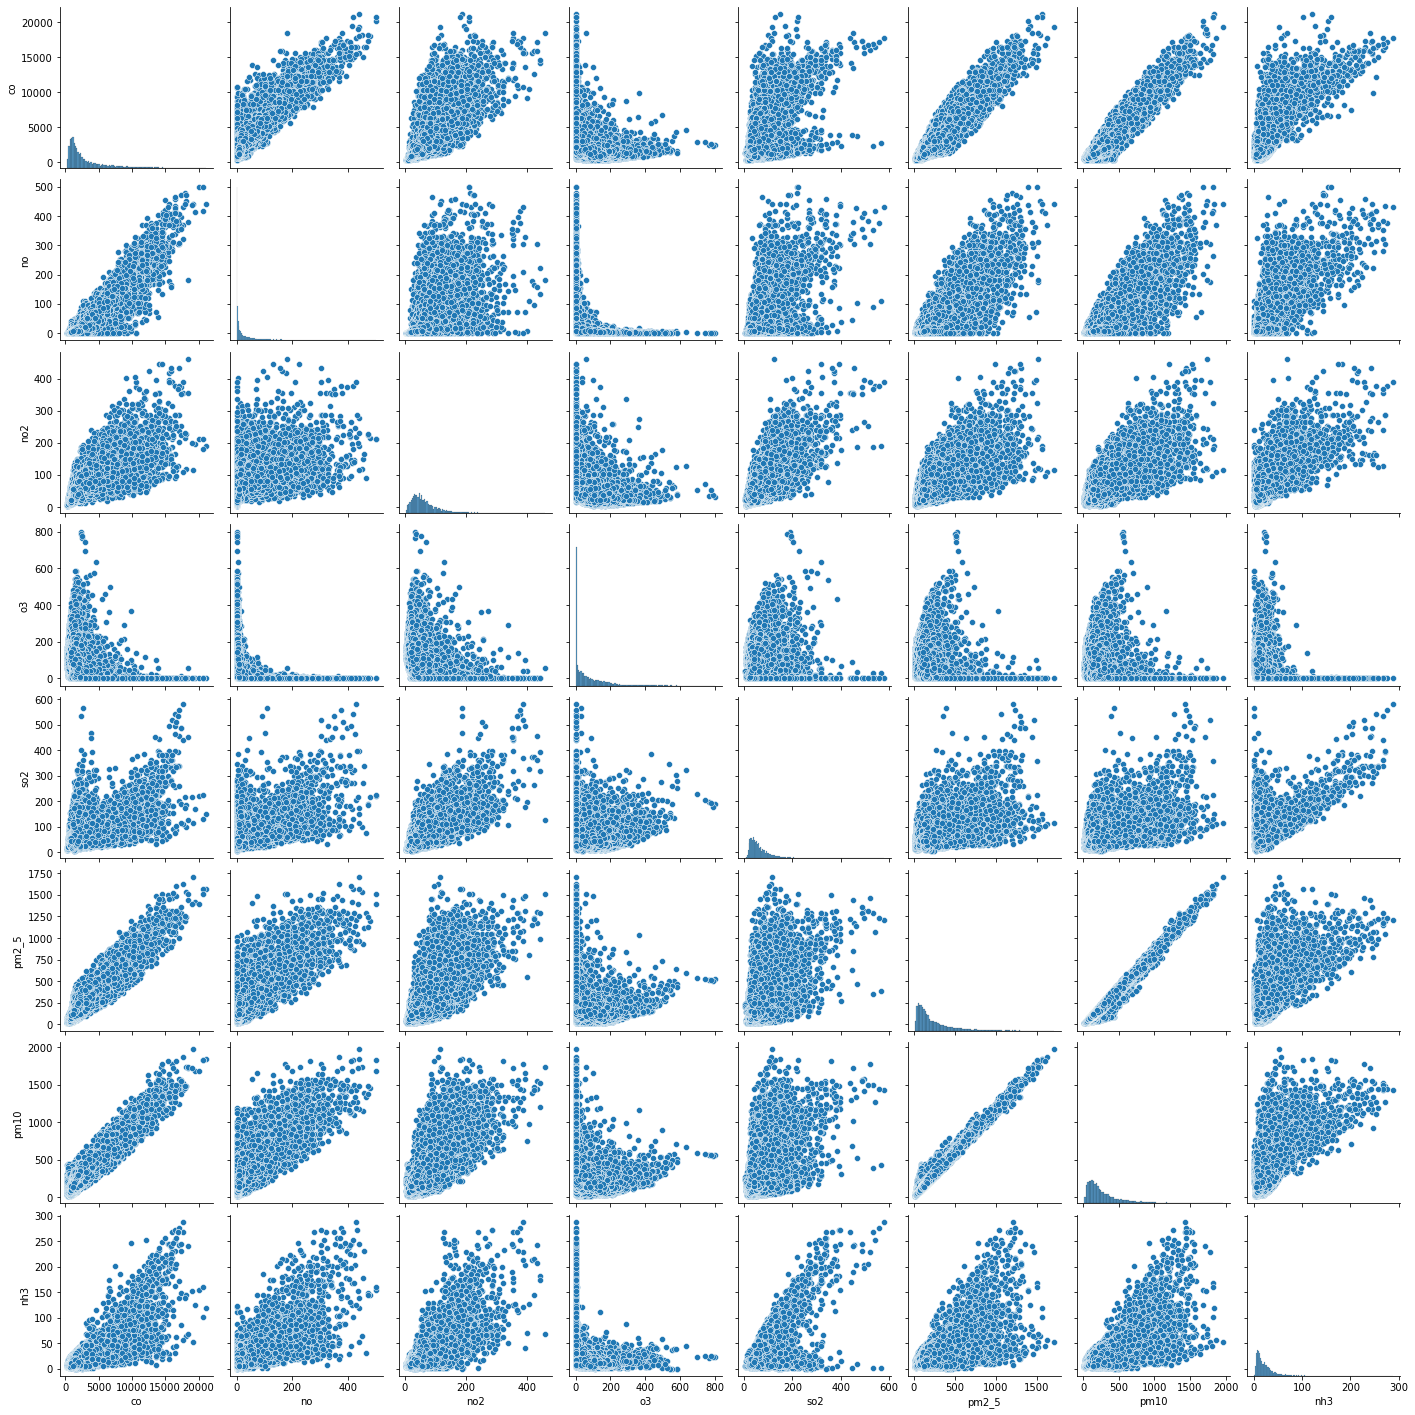

In [14]:
sns.pairplot(aq)

In [15]:
aq['date']=pd.to_datetime(aq['date'])
aq['day']=aq.date.dt.day
aq['month']=aq.date.dt.month
aq['year']=aq.date.dt.year
aq['hour']=aq.date.dt.hour

In [16]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18776 non-null  datetime64[ns]
 1   co      18776 non-null  float64       
 2   no      18776 non-null  float64       
 3   no2     18776 non-null  float64       
 4   o3      18776 non-null  float64       
 5   so2     18776 non-null  float64       
 6   pm2_5   18776 non-null  float64       
 7   pm10    18776 non-null  float64       
 8   nh3     18776 non-null  float64       
 9   day     18776 non-null  int64         
 10  month   18776 non-null  int64         
 11  year    18776 non-null  int64         
 12  hour    18776 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(4)
memory usage: 1.9 MB


In [17]:
aq.head(2)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,day,month,year,hour
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,25,11,2020,1
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,25,11,2020,2


In [18]:
a=np.array(aq.month.unique())
a.sort()
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [19]:
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
for i in range(1,13):
    mpm=aq.groupby('month').get_group(i)['pm10'].mean()
    l1.append(mpm)
for i in range(1,13):
    mpm=aq.groupby('month').get_group(i)['pm2_5'].mean()
    l2.append(mpm)
for i in range(1,13):
    mpm=aq.groupby('month').get_group(i)['nh3'].mean()
    l3.append(mpm)
for i in range(1,13):
    mpm=aq.groupby('month').get_group(i)['no'].mean()
    l4.append(mpm)
for i in range(1,13):
    mpm=aq.groupby('month').get_group(i)['co'].mean()
    l5.append(mpm)


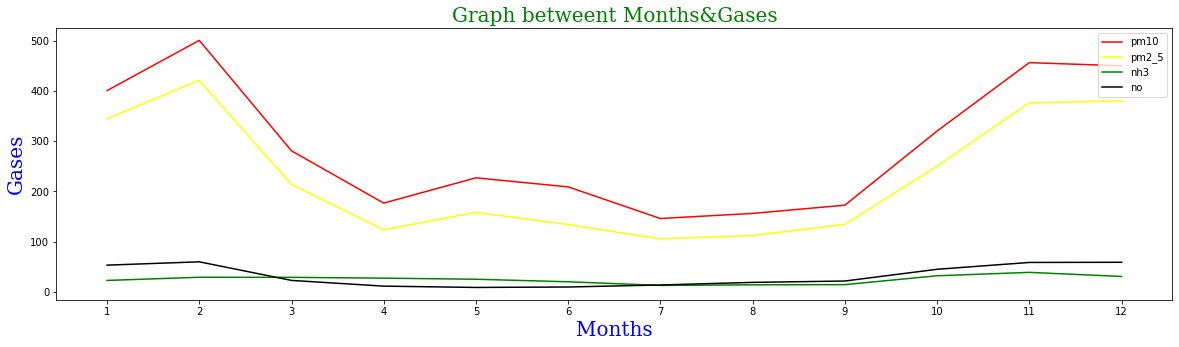

In [20]:
plt.figure(figsize=(20,5))
plt.plot(a,l1,color = 'red' )
plt.plot(a,l2,color = 'yellow')
plt.plot(a,l3,color = 'green')
plt.plot(a,l4,color = 'black')
plt.title("Graph betweent Months&Gases", fontdict = {'family':'serif','color':'green','size':20})
plt.xlabel("Months", fontdict = {'family':'serif','color':'blue','size':20})
plt.ylabel("Gases", fontdict = {'family':'serif','color':'blue','size':20})
plt.legend(["pm10",'pm2_5','nh3','no'], loc ="upper right")
plt.xticks(a);

In [21]:
h=np.array(aq.hour.unique())
h.sort()
h

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [22]:
h1=[]
for i in range(0,24):
    mpm=aq.groupby('hour').get_group(i)['co'].mean()
    h1.append(mpm)


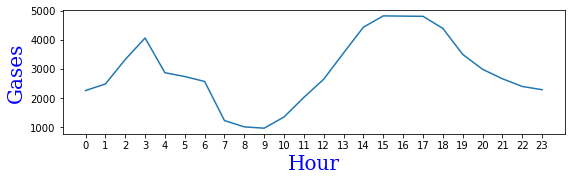

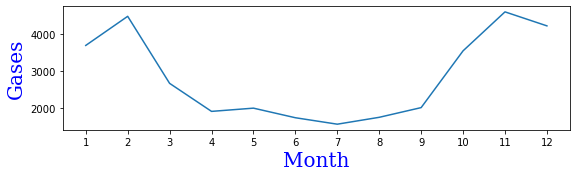

In [23]:
plt.figure(figsize=(9,5))
plt.subplot(2,1,1);
plt.plot(h,h1)
plt.xlabel("Hour", fontdict = {'family':'serif','color':'blue','size':20})
plt.ylabel("Gases", fontdict = {'family':'serif','color':'blue','size':20})
plt.xticks(h);
plt.figure(figsize=(20,5))
plt.subplot(2,2,1);
plt.xlabel("Month", fontdict = {'family':'serif','color':'blue','size':20})
plt.ylabel("Gases", fontdict = {'family':'serif','color':'blue','size':20})
plt.plot(a,l5)
plt.xticks(a);

Text(0, 0.5, 'PM2_5')

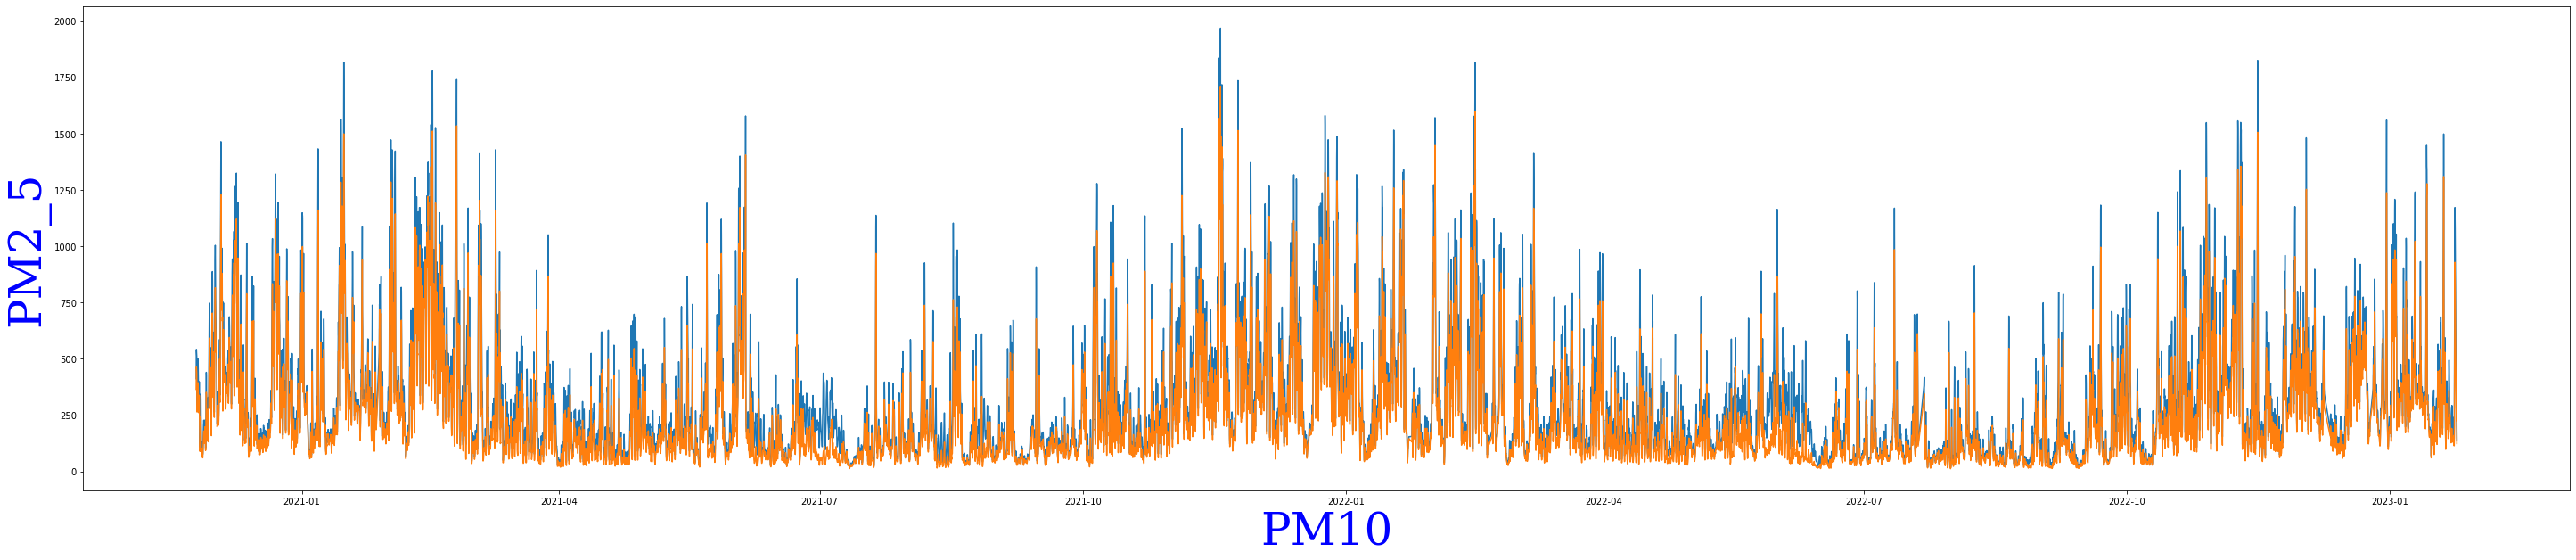

In [24]:
plt.figure(figsize=(50,10))
plt.plot(aq.date,aq.pm10)
plt.plot(aq.date,aq.pm2_5)
plt.xlabel("PM10", fontdict = {'family':'serif','color':'blue','size':50})
plt.ylabel("PM2_5", fontdict = {'family':'serif','color':'blue','size':50})

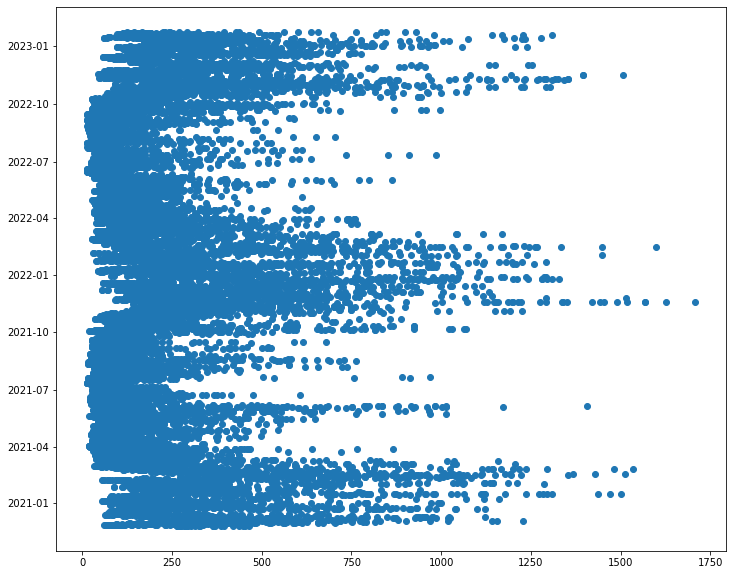

In [25]:
fig, ax = plt.subplots(figsize = (12,10))
ax.scatter(aq['pm2_5'],aq['date'])

C:\Users\Nkmanithia\AppData\anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


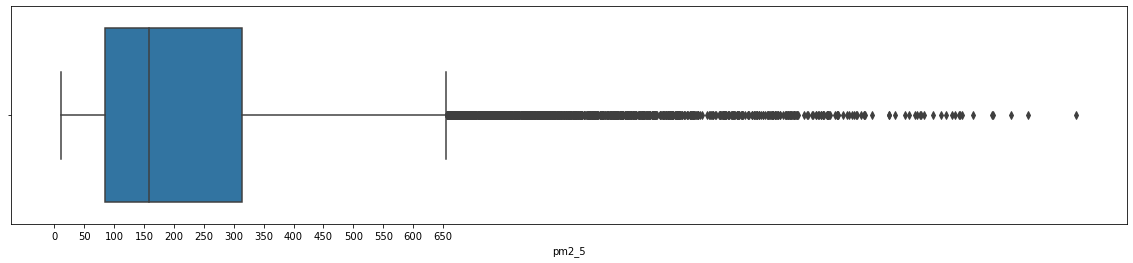

In [26]:
import seaborn as sns
plt.subplots(figsize = (20,4))
sns.boxplot(aq['pm2_5'])
plt.xticks(range(0,700,50));

In [27]:
#outl=np.where(aq.pm2_5>650)
#aq.drop(np.where(aq.pm2_5>650)[0], inplace = True)

C:\Users\Nkmanithia\AppData\anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='co'>

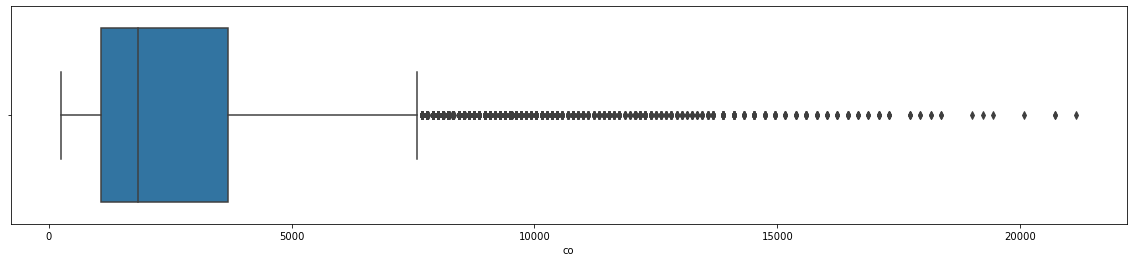

In [28]:
import seaborn as sns
plt.subplots(figsize = (20,4))
sns.boxplot(aq['co'])


In [29]:
#aq.drop(aq[aq['co']>5500].index, inplace = True)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(aq.co,aq.pm2_5,test_size=0.2)

In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
lr=LinearRegression()

In [3]:
x_train=np.array(x_train).reshape(15020,1)

NameError: name 'np' is not defined

In [ ]:
y_train=np.array(y_train).reshape(15020,1)

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
y_pred=lr.predict(np.array(x_test).reshape(3756,1))

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(aq.co,aq.pm2_5)
plt.plot(x_test,lr.predict(np.array(x_test).reshape(3756,1)),color='red')

In [ ]:
m = lr.coef_
m

In [39]:
c=lr.intercept_
c

array([20.38356089])

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [41]:
mae = mean_absolute_error(y_test,y_pred)
print("MAE without outliers:", mae)
mse = mean_squared_error(y_test,y_pred)
print("MSE without outliers:", mse)

MAE without outliers: 57.59518937080867
MSE without outliers: 6452.172232898609


In [42]:
aq.iloc[:,1:3]

,co,no
0,2616.88,2.18
1,3631.59,23.25
2,4539.49,52.75
3,4539.49,50.96
4,4379.27,42.92
...,...,...
18771,1762.39,4.64
18772,1735.69,6.82
18773,1922.61,8.16
18774,1361.85,9.05


In [43]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(aq.iloc[:,1:3],aq.pm2_5,test_size=0.2)

In [44]:
lr.fit(x1_train,y1_train)

LinearRegression()

In [45]:
y1_pred=lr.predict(x1_test)
y1_pred

array([ 256.08672832,  167.93753184,  462.01963745, ...,  221.70830639,
        334.62854931, 1166.04533392])

In [46]:
from mpl_toolkits import mplot3d

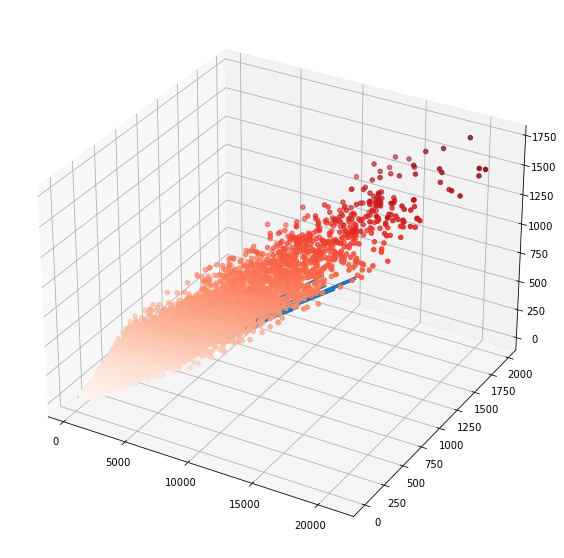

In [47]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot(x1_test.co,x1_test.no,y1_pred)
ax.scatter3D(aq.co, aq.pm10, aq.pm2_5, c=aq.pm2_5, cmap='Reds');

In [48]:
aq.head(12)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,day,month,year,hour
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,25,11,2020,1
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,25,11,2020,2
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,25,11,2020,3
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,25,11,2020,4
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,25,11,2020,5
5,2020-11-25 06:00:00,3898.62,28.39,117.90,40.05,101.09,437.25,511.79,42.05,25,11,2020,6
6,2020-11-25 07:00:00,1949.31,14.53,105.56,83.69,185.01,312.76,349.20,12.79,25,11,2020,7
7,2020-11-25 08:00:00,1508.71,11.62,112.41,87.98,217.44,275.53,303.47,6.59,25,11,2020,8
8,2020-11-25 09:00:00,1361.85,7.04,109.67,95.84,213.62,263.51,289.86,6.02,25,11,2020,9
9,2020-11-25 10:00:00,1602.17,3.10,93.22,104.43,152.59,271.25,302.27,12.16,25,11,2020,10


In [49]:
seasons = { 1:'Winter', 2:'Winter', 3:'Summer', 4:'Summer', 5:'Summer',
           6:'Monsoon', 7:'Monsoon', 8:'Monsoon',9:'Monsoon', 10:'Autumn', 11:'Autumn',12:'Winter',}
aq['seasons']=aq['month'].map(seasons)

In [50]:
aq.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,day,month,year,hour,seasons
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,25,11,2020,1,Autumn
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,25,11,2020,2,Autumn
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,25,11,2020,3,Autumn
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,25,11,2020,4,Autumn
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,25,11,2020,5,Autumn


In [51]:
newl=[]
def AQI1(Cp,BPLo,BPHi,ILo,IHi):
    global Ip1 
    Ip1= ((IHi-ILo)/(BPHi-BPLo))*(Cp-BPLo)+ ILo
def AQI2(Cp,BPLo,BPHi,ILo,IHi):
    global Ip2
    Ip2= ((IHi-ILo)/(BPHi-BPLo))*(Cp-BPLo)+ ILo
def AQI3(Cp,BPLo,BPHi,ILo,IHi):
    global Ip3
    Ip3= ((IHi-ILo)/(BPHi-BPLo))*(Cp-BPLo)+ ILo
def AQI4(Cp,BPLo,BPHi,ILo,IHi):
    global Ip4
    Ip4 = ((IHi-ILo)/(BPHi-BPLo))*(Cp-BPLo)+ ILo
def AQI5(Cp,BPLo,BPHi,ILo,IHi):
    global Ip5
    Ip5 = ((IHi-ILo)/(BPHi-BPLo))*(Cp-BPLo)+ ILo
def AQI6(Cp,BPLo,BPHi,ILo,IHi):
    global Ip6
    Ip6 = ((IHi-ILo)/(BPHi-BPLo))*(Cp-BPLo)+ ILo
def AQI7(Cp,BPLo,BPHi,ILo,IHi):
    global Ip7
    Ip7 = ((IHi-ILo)/(BPHi-BPLo))*(Cp-BPLo)+ ILo
    
for i in range(len(df)):
    x=aq1.pm2_5[i]
    if x>0 and x<30:
        AQI1(x,0,30,0,50)
    elif x>31 and x<60:
        AQI1(x,31,60,101,200)
    elif x>61 and x<90:
        AQI1(x,61,90,201,300)
    elif x>91 and x<120:
        AQI1(x,91,120,201,300)
    elif x>121 and x<250:
        AQI1(x,121,250,301,400)
    else :
        AQI1(x,250,500,401,500)
    
    x=aq1.pm10[i]
    if x>0 and x<50:
        AQI2(x,0,50,0,50)
    elif x>51 and x<100:
        AQI2(x,51,100,101,200)
    elif x>101 and x<250:
        AQI2(x,101,250,201,300)
    elif x>251and x<350:
        AQI2(x,251,350,201,300)
    elif x>351 and x<430:
        AQI2(x,351,430,301,400)
    else :
        AQI2(x,431,520,401,500)
        
    x=aq1.co[i]/1000
    if x>0 and x<1:
        AQI3(x,0,1,0,50)
    elif x>1.1 and x<2:
        AQI3(x,1.1,2,101,200)
    elif x>1 and x<10:
        AQI3(x,2.1,10,201,300)
    elif x>10.1 and x<17:
        AQI3(x,10.1,17,201,300)
    elif x>17.1 and x<34:
        AQI3(x,17.1,34,301,400)
    else :
        AQI3(x,34,50,401,500)
        
    x=aq1.o3[i]
    if x>0 and x<50:
        AQI4(x,0,50,0,50)
    elif x>51 and x<100:
        AQI4(x,51,100,101,200)
    elif x>101 and x<168:
        AQI4(x,101,168,201,300)
    elif x>169 and x<208:
        AQI4(x,169,208,201,300)
    elif x>209 and x<748:
        AQI4(x,209,748,301,400)
    else :
        AQI4(x,748,1000,401,500) 
        
    x=aq1.no2[i]/1000
    if x>0 and x<1:
        AQI5(x,0,1,0,50)
    elif x>1.1 and x<2:
        AQI5(x,1.1,2,101,200)
    elif x>1 and x<10:
        AQI5(x,2.1,10,201,300)
    elif x>10.1 and x<17:
        AQI5(x,10.1,17,201,300)
    elif x>17.1 and x<34:
        AQI5(x,17.1,34,301,400)
    else :
        AQI5(x,34,50,401,500)
        
    x=aq1.so2[i]
    if x>0 and x<40:
        AQI6(x,0,40,0,50)
    elif x>41 and x<80:
        AQI6(x,41,80,101,200)
    elif x>81 and x<380:
        AQI6(x,81,380,201,300)
    elif x>381 and x<800:
        AQI6(x,381,800,201,300)
    elif x>801 and x<1600:
        AQI6(x,801,1600,301,400)
    else :
        AQI6(x,1600,2000,401,500)
    
    x=aq1.nh3[i]
    if x>0 and x<200:
        AQI7(x,0,200,0,50)
    elif x>201 and x<400:
        AQI7(x,201,400,101,200)
    elif x>401 and x<800:
        AQI7(x,401,800,201,300)
    elif x>801 and x<1200:
        AQI7(x,801,1200,201,300)
    elif x>1201 and x<1800:
        AQI7(x,1201,1800,301,400)
    else :
        AQI7(x,1801,2400,401,500)
        
    if(Ip1>Ip2 and Ip1>Ip3 and Ip1>Ip4 and Ip1>Ip5 and Ip1>Ip6 and Ip1>Ip7):
        newl.append(Ip1)
    elif(Ip2>Ip3 and Ip2>Ip4 and Ip2>Ip5 and Ip2>Ip6 and Ip2>Ip7):
        newl.append(Ip2)
    elif(Ip3>Ip4 and Ip3>Ip5 and Ip3>Ip6 and Ip3>Ip7):
        newl.append(Ip3)
    elif(Ip4>Ip5 and Ip4>Ip6 and Ip4>Ip7):
        newl.append(Ip4)
    elif(Ip5>Ip6 and Ip5>Ip7): 
        newl.append(Ip5)
    elif(Ip6>Ip7 ):
        newl.append(Ip6)
    else:
        newl.append(Ip7)
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        

NameError: name 'aq1' is not defined